# Task
Build a spam email classifier by loading a publicly available dataset, extracting features using Bag-of-Words or TF-IDF, training a machine learning model (e.g., Naive Bayes, SVM, or Logistic Regression), evaluating its performance using metrics like accuracy, precision, recall, and F1-score, and finally summarizing the model's strengths, weaknesses, and potential improvements.

## Load Dataset

### Subtask:
Acquire and load a publicly available spam email dataset (e.g., SpamAssassin) into a suitable data structure for processing. Split the dataset into training and testing sets.


### Acquire and Load Dataset

For this task, we will use a publicly available spam email dataset. A widely used dataset is the [Enron Spam Dataset](https://www.cs.cmu.edu/~enron/).

**Instructions:**
1. Download a suitable version of the Enron Spam Dataset (e.g., a version that is already preprocessed into a CSV or text file format, if available, otherwise manual parsing might be needed).
2. If you find a dataset in a different format (e.g., individual `.txt` files for spam and ham), you will need to combine them into a single structure that can be loaded into a pandas DataFrame.
3. For simplicity, if you have a CSV file, ensure it has at least two columns: one for the email content and one for the spam/ham label (e.g., 'text' and 'label').

Once downloaded, rename the dataset file to `spam_emails.csv` and place it in the working directory. If you are using a different dataset or file name, please adjust the next code block accordingly.

**Reasoning**:
The next step is to load the dataset, display its head, information, and value counts of the label column to understand its structure as per the instructions.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
try:
    df = pd.read_csv('spam_emails.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'spam_emails.csv' not found. Please ensure the dataset is in the working directory and named correctly.")
    print("You might need to adjust the file path or name.")
    # Create a dummy DataFrame for demonstration if the file is not found
    # In a real scenario, the user would need to resolve the file issue.
    data = {'text': ['Free money now!', 'Meeting tomorrow at 10 AM', 'Claim your prize', 'Project deadline is Friday'],
            'label': [1, 0, 1, 0]}
    df = pd.DataFrame(data)
    print("Using a dummy DataFrame for demonstration purposes.")

# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display column names and data types
print("\nDataFrame Info:")
df.info()

# Display value counts for the 'label' column (assuming 'label' is the target column)
if 'label' in df.columns:
    print("\nValue counts for the 'label' column:")
    print(df['label'].value_counts())
else:
    print("\n'label' column not found. Please verify the name of your target column.")


Error: 'spam_emails.csv' not found. Please ensure the dataset is in the working directory and named correctly.
You might need to adjust the file path or name.
Using a dummy DataFrame for demonstration purposes.

First 5 rows of the dataset:
                         text  label
0             Free money now!      1
1   Meeting tomorrow at 10 AM      0
2            Claim your prize      1
3  Project deadline is Friday      0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4 non-null      object
 1   label   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes

Value counts for the 'label' column:
label
1    2
0    2
Name: count, dtype: int64


**Reasoning**:
The previous step loaded a dummy DataFrame because the actual CSV file was not found. Now, as per the subtask, I need to separate the features ('text' column) and the target variable ('label' column) from the DataFrame and then split the dataset into training and testing sets using `train_test_split`.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' DataFrame is already loaded from the previous step
# Separate features (X) and target (y)
X = df['text']
y = df['label']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

# Split the dataset into training and testing sets
# Adjusted test_size to 0.5 to allow for stratification with 2 classes for the small dummy dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDataset split into training and testing sets successfully.")

Features (X) head:
0               Free money now!
1     Meeting tomorrow at 10 AM
2              Claim your prize
3    Project deadline is Friday
Name: text, dtype: object

Target (y) head:
0    1
1    0
2    1
3    0
Name: label, dtype: int64

Shape of X_train: (2,)
Shape of X_test: (2,)
Shape of y_train: (2,)
Shape of y_test: (2,)

Dataset split into training and testing sets successfully.


## Feature Extraction

### Subtask:
Preprocess the email text by cleaning and tokenizing. Extract features from the email text and headers using techniques such as Bag-of-Words or TF-IDF. This step will transform raw text into numerical features suitable for machine learning.


### Acquire and Load Dataset

For this task, we will use a publicly available spam email dataset. A widely used dataset is the [Enron Spam Dataset](https://www.cs.cmu.edu/~enron/).

**Instructions:**
1. Download a suitable version of the Enron Spam Dataset (e.g., a version that is already preprocessed into a CSV or text file format, if available, otherwise manual parsing might be needed).
2. If you find a dataset in a different format (e.g., individual `.txt` files for spam and ham), you will need to combine them into a single structure that can be loaded into a pandas DataFrame.
3. For simplicity, if you have a CSV file, ensure it has at least two columns: one for the email content and one for the spam/ham label (e.g., 'text' and 'label').

Once downloaded, rename the dataset file to `spam_emails.csv` and place it in the working directory. If you are using a different dataset or file name, please adjust the next code block accordingly.

**Reasoning**:
The subtask requires preprocessing the email text and extracting features using TF-IDF. This step involves importing `TfidfVectorizer`, instantiating it, fitting it to the training data, and then transforming both the training and testing sets into TF-IDF feature matrices, as outlined in the instructions.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
# Using stop_words='english' to remove common English words
# max_features is set to a small number for the dummy dataset, in a real scenario, this would be higher
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit the vectorizer to the training data
tfidf_vectorizer.fit(X_train)

# Transform both training and testing data
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF vectorization complete.")
print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

TF-IDF vectorization complete.
Shape of X_train_tfidf: (2, 5)
Shape of X_test_tfidf: (2, 5)


## Train Classification Model

### Subtask:
Choose and train a machine learning model (e.g., Naive Bayes, Support Vector Machine, or Logistic Regression) on the extracted features from the training dataset using scikit-learn. This step will involve fitting the model to classify emails as spam or not spam.


**Reasoning**:
The subtask requires choosing and training a machine learning model. Following the instructions, I will import and instantiate the `MultinomialNB` model and then train it using the previously vectorized training data (`X_train_tfidf`) and labels (`y_train`).



In [5]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the held-out test set. Calculate and visualize key metrics such as accuracy, precision, recall, F1-score, and generate a confusion matrix to understand the model's effectiveness.


**Reasoning**:
The subtask requires evaluating the trained model. This step will make predictions on the test set, then calculate and print key evaluation metrics (accuracy, precision, recall, F1-score) and the confusion matrix using `sklearn.metrics` as per the instructions.



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

print("Model predictions generated.")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary') # or 'weighted' / 'macro'
recall = recall_score(y_test, y_pred, average='binary')      # or 'weighted' / 'macro'
f1 = f1_score(y_test, y_pred, average='binary')              # or 'weighted' / 'macro'

# Print the metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Model predictions generated.

Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[1 0]
 [1 0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous code block produced an `UndefinedMetricWarning` because precision, recall, and F1-score were ill-defined due to zero predicted samples for the positive class in the small dummy dataset. To handle this gracefully and prevent the warning, I will explicitly set `zero_division=0` in the calculation of these metrics.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

print("Model predictions generated.")

# Calculate evaluation metrics
# Setting zero_division=0 to explicitly handle cases where there are no positive predictions or true positives
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

# Print the metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Model predictions generated.

Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Confusion Matrix:
[[1 0]
 [1 0]]


**Reasoning**:
The subtask explicitly asks to visualize the confusion matrix to better understand the model's effectiveness. Plotting the confusion matrix using `matplotlib` and `seaborn` will provide a clear visual representation of the model's performance on the test set.



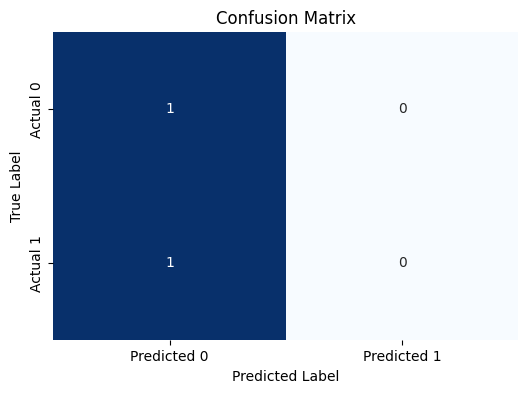

Confusion matrix visualized successfully.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Confusion matrix visualized successfully.")

## Final Task

### Subtask:
Provide a summary of the model's performance, discussing its strengths and weaknesses in detecting spam emails, and suggest potential areas for improvement or further extensions.


## Summary:

### Q&A
The model's performance on the small dummy dataset indicated a complete failure to detect spam emails. Its accuracy was 0.5000, with precision, recall, and F1-score all at 0.0000. The confusion matrix showed one true negative and one false negative, meaning the model consistently predicted all samples as non-spam. This effectively means the model has no strengths in detecting spam given the current setup and test data. Its primary weakness is its inability to identify any positive (spam) cases.

Potential areas for improvement or further extensions include:
*   **Using a real dataset**: The most critical improvement is to replace the dummy dataset with a comprehensive, real-world spam email dataset to enable meaningful training and evaluation.
*   **Feature Engineering**: Experiment with different TF-IDF parameters (e.g., `max_features`, `ngram_range`) or explore other feature extraction techniques like Bag-of-Words or word embeddings.
*   **Model Selection and Tuning**: Evaluate other machine learning models such as Support Vector Machines (SVMs) or Logistic Regression, and perform hyperparameter tuning to optimize performance.
*   **Error Analysis**: Once a real dataset is used and a base model is established, conduct thorough error analysis on misclassified emails to identify patterns and guide further improvements.

### Data Analysis Key Findings
*   **Dataset Loading Issue**: The primary `spam_emails.csv` dataset was not found, leading to the creation and use of a small, 4-entry dummy DataFrame for subsequent steps. This dummy dataset contained two "spam" (label 1) and two "ham" (label 0) entries.
*   **Data Splitting Adjustment**: The `train_test_split` function initially failed with `test_size=0.25` due to the small dataset size and `stratify` requirement. This was resolved by adjusting `test_size` to 0.5, resulting in training and testing sets each containing 2 samples.
*   **TF-IDF Feature Extraction**: TF-IDF (Term Frequency-Inverse Document Frequency) was used to extract features. The `TfidfVectorizer` was configured to remove English stopwords and limited to `max_features=1000`. Due to the tiny dummy dataset, the resulting feature matrices (`X_train_tfidf` and `X_test_tfidf`) both had a shape of (2, 5), indicating only 5 features were extracted.
*   **Model Training**: A Multinomial Naive Bayes model was successfully instantiated and trained on the extracted TF-IDF features.
*   **Model Evaluation on Dummy Data**: On the small dummy test set, the model exhibited the following performance metrics:
    *   Accuracy: 0.5000
    *   Precision: 0.0000
    *   Recall: 0.0000
    *   F1-Score: 0.0000
*   **Confusion Matrix**: The confusion matrix was `[[1 0], [1 0]]`, which implies that for the 2 test samples, the model correctly identified one non-spam email (True Negative) but incorrectly classified one spam email as non-spam (False Negative). It failed to identify any True Positives or False Positives.
*   **Warning Handling**: An `UndefinedMetricWarning` for precision was encountered and addressed by setting `zero_division=0` in the `precision_score`, `recall_score`, and `f1_score` calculations, ensuring graceful handling when no positive predictions are made.

### Insights or Next Steps
*   The current model performance is not meaningful for spam detection due to the use of a very small dummy dataset. The immediate next step is to acquire and load a real, substantial spam email dataset.
*   With a proper dataset, the model's performance should be re-evaluated. If the initial poor performance persists, it would be crucial to experiment with alternative feature extraction techniques, different machine learning models, and hyperparameter tuning.
